# Using Data to Improve MLB Attendance

### Keiuntae Smith
### DSC 630 Predictive Analysis 
### 22 June 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st 

In [2]:
#read in the dodgers.csv file
dodgers_df = pd.read_csv("dodgers-2022.csv")
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
#display the number of rows and columns
dodgers_df.shape

(81, 12)

In [4]:
#display the column data types
dodgers_df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [5]:
#display count of the empty values for each columns
dodgers_df.isna().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [6]:
#check for any missing / null values within the data
dodgers_df.isnull().values.any()

False

In [7]:
#view some statistics
dodgers_df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


## Get a sense of how the attendence was distributed

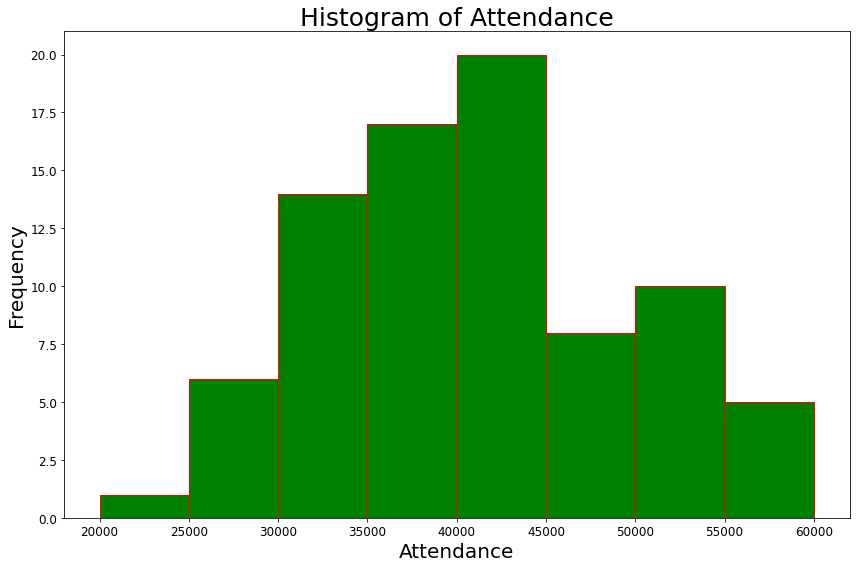

In [8]:
# generate a histogram of attendance distribution
plt.rcParams['figure.figsize'] = [12, 8]
bins = [20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]
plt.hist(dodgers_df.attend, bins=bins, color='green', edgecolor= 'red')
plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram of Attendance", fontsize=25)
plt.xlabel("Attendance", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tight_layout()

## Attendance by the Month 

Text(0, 0.5, 'Attendance')

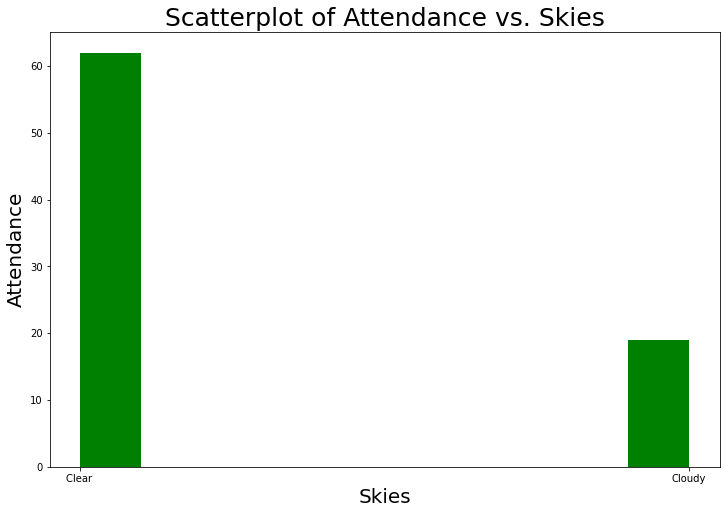

In [9]:
# Scatterplot for Temperature vs. Attendance
plt.rcParams['figure.figsize'] = [12, 8]
bins=[0,1]
plt.hist(dodgers_df.skies, color='green')
plt.xticks(bins)
plt.yticks(fontsize=10)
plt.title("Scatterplot of Attendance vs. Skies", fontsize=25, color='black')
plt.xlabel("Skies", fontsize=20, color='black')
plt.ylabel("Attendance", fontsize=20, color='black')

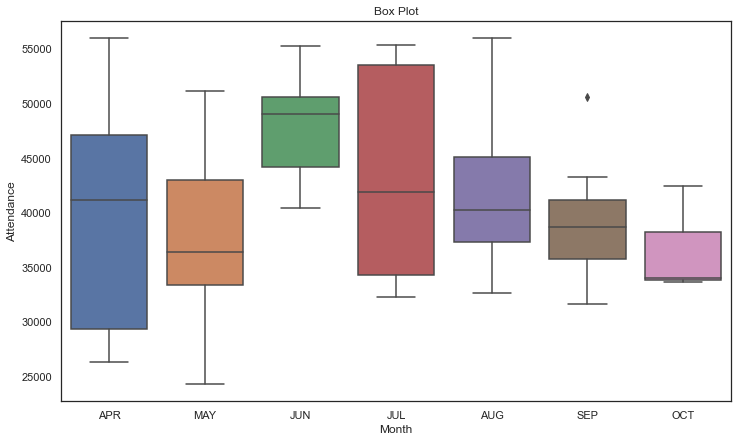

In [10]:
#create a boxblot to show the attendance by the month
sns.set(style='white')
plt.figure(figsize=(12,7))

sns.boxplot(data=dodgers_df, x='month',y='attend')
plt.title("Box Plot")
plt.xlabel('Month')
plt.ylabel('Attendance');

Although April and August had the highest attendance day recorded, based on the graph generated above, attendance is overall higher in the summer months. This is true because the median value for summer months were higher than the median of value of spring and fall months. 

## Attendance by day of the week

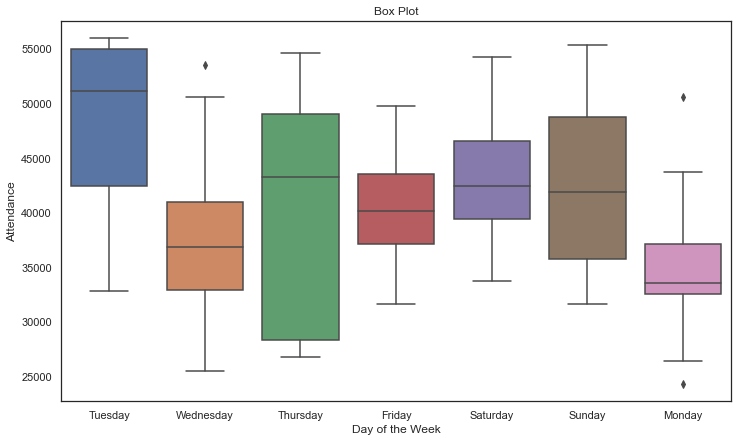

In [11]:
#create a boxblot to show the attendance by the day of the week 
sns.set(style='white')
plt.figure(figsize=(12,7))

sns.boxplot(data=dodgers_df, x='day_of_week',y='attend')
plt.title("Box Plot")
plt.xlabel('Day of the Week')
plt.ylabel('Attendance');

The boxplot graph above displays that Tuesdays tends to be the preferred day to attend a Dodgers baseball game.  The median value of 52000 is approximately 9000 more than the closest median value of Thursday.   

## Attendance by the opponent faced

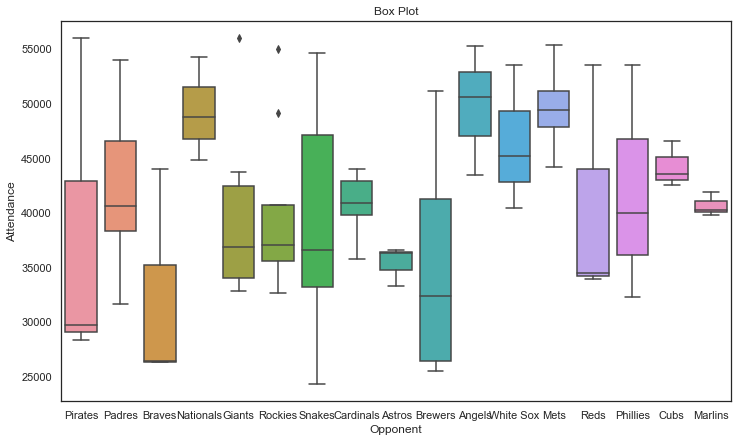

In [12]:
#create a boxblot to show the attendance by the Opponent
sns.set(style='white')
plt.figure(figsize=(12,7))

sns.boxplot(data=dodgers_df, x='opponent',y='attend')
plt.title("Box Plot")
plt.xlabel('Opponent')
plt.ylabel('Attendance');

On average, the attendance is generally higher during games where the opponents faced are the Angels, Mets, and Nationals. 

In [13]:
#transform the categorical entries to ordinal integers
ord_enc = OrdinalEncoder()

dodgers_df['month'] = ord_enc.fit_transform(dodgers_df[['month']])
dodgers_df['day_of_week'] = ord_enc.fit_transform(dodgers_df[['day_of_week']])
dodgers_df['opponent'] = ord_enc.fit_transform(dodgers_df[['opponent']])
dodgers_df['skies'] = ord_enc.fit_transform(dodgers_df[['skies']])
dodgers_df['opponent'] = ord_enc.fit_transform(dodgers_df[['opponent']])
dodgers_df['skies'] = ord_enc.fit_transform(dodgers_df[['skies']])
dodgers_df['day_night'] = ord_enc.fit_transform(dodgers_df[['day_night']])
dodgers_df['cap'] = ord_enc.fit_transform(dodgers_df[['cap']])
dodgers_df['shirt'] = ord_enc.fit_transform(dodgers_df[['shirt']])
dodgers_df['fireworks'] = ord_enc.fit_transform(dodgers_df[['fireworks']])
dodgers_df['bobblehead'] = ord_enc.fit_transform(dodgers_df[['bobblehead']])

In [14]:
#display the new dataframe
pd.set_option('display.max_rows', None)
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,0.0,10,56000,5.0,12.0,67,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,11,29729,6.0,12.0,58,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,12,28328,4.0,12.0,57,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,13,31601,0.0,10.0,54,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,14,46549,2.0,10.0,57,1.0,1.0,0.0,0.0,0.0,0.0


## Generate Scatter plot to show attendance correlation in respect to the temperature

Text(0, 0.5, 'Attendance')

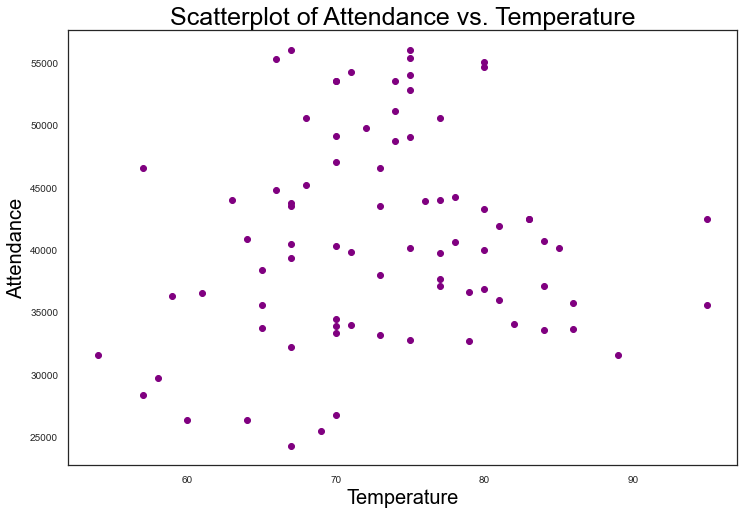

In [15]:
# Scatterplot for Temperature vs. Attendance
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(dodgers_df.temp, dodgers_df.attend, color='purple')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Scatterplot of Attendance vs. Temperature", fontsize=25, color='black')
plt.xlabel("Temperature", fontsize=20, color='black')
plt.ylabel("Attendance", fontsize=20, color='black')

According to the temperature scatterplot, attendance is optimal for temperatures within the range of 70 and 80 degrees.  

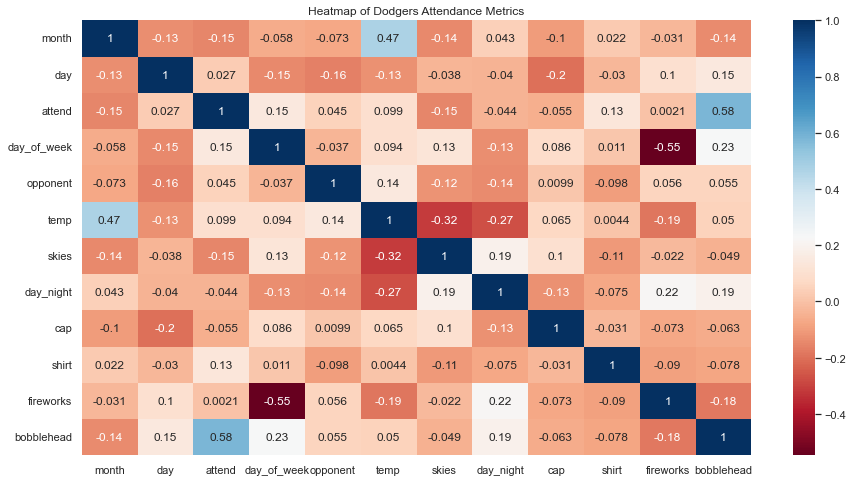

In [16]:
#display a heatmap to check the correlation betweeen variables 
corr = dodgers_df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu", annot=True)
plt.title('Heatmap of Dodgers Attendance Metrics')
plt.show()

In [17]:
#use the numpy function to calculate the correlation between attendance and sales of bobbleheads
np.corrcoef(dodgers_df['attend'], dodgers_df['bobblehead'])

array([[1.        , 0.58189497],
       [0.58189497, 1.        ]])

In [18]:
st.pearsonr(dodgers_df['attend'], dodgers_df['cap'])

(-0.055002442109823795, 0.6257641989350163)

In [19]:
st.pearsonr(dodgers_df['attend'], dodgers_df['shirt'])

(0.13326867137616516, 0.235592721164504)

In [20]:
st.pearsonr(dodgers_df['attend'], dodgers_df['fireworks'])

(0.002094459827698361, 0.9851943703995104)

In [21]:
st.pearsonr(dodgers_df['attend'], dodgers_df['bobblehead'])

(0.5818949681431962, 1.2169642509120266e-08)

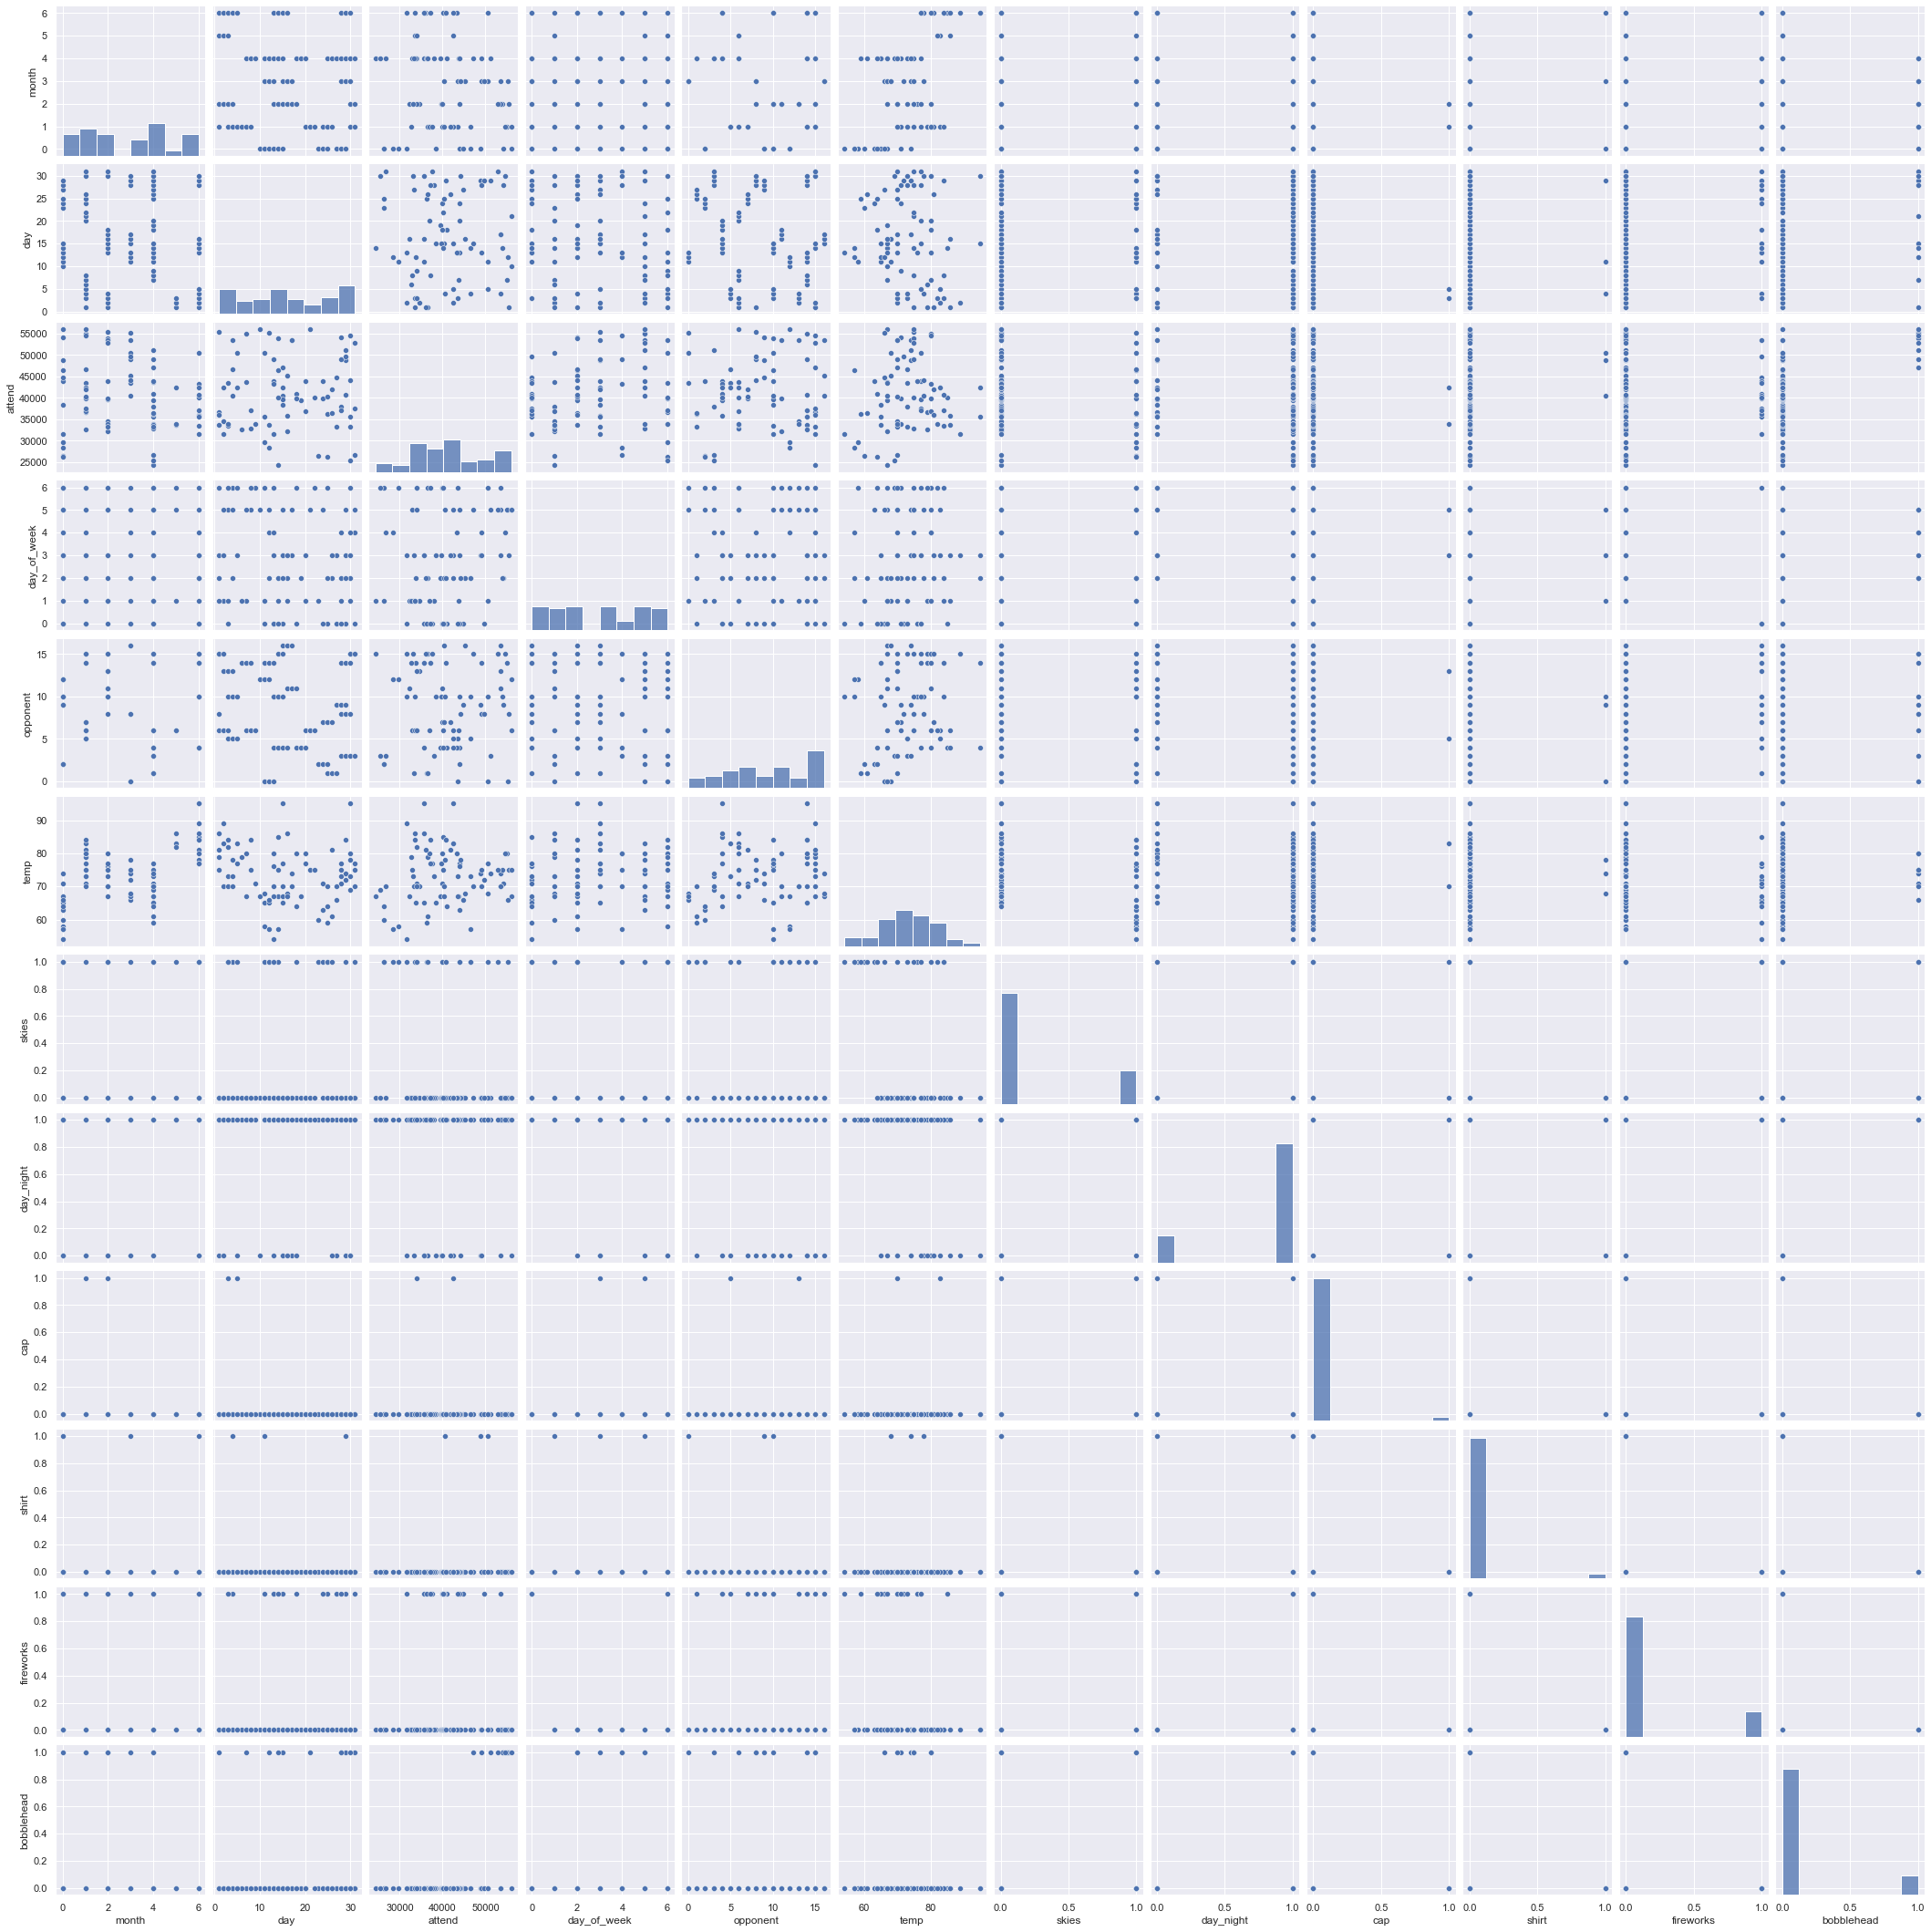

In [22]:
sns.pairplot(dodgers_df)

In [23]:
#check the correlation metrics
dodgers_df.corr()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
month,1.000000,-0.130420,-0.152777,-0.057980,-0.072978,0.470073,-0.144692,0.043046,-0.103261,0.022135,-0.031324,-0.138293
day,-0.130420,1.000000,0.027093,-0.148394,-0.161508,-0.127612,-0.038396,-0.039828,-0.202274,-0.030182,0.099528,0.145363
attend,-0.152777,0.027093,1.000000,0.147216,0.045021,0.098951,-0.150963,-0.043544,-0.055002,0.133269,0.002094,0.581895
day_of_week,-0.057980,-0.148394,0.147216,1.000000,-0.037491,0.094009,0.129190,-0.134049,0.086038,0.010605,-0.547327,0.231893
opponent,-0.072978,-0.161508,0.045021,-0.037491,1.000000,0.143428,-0.118707,-0.136669,0.009916,-0.097778,0.055959,0.055025
temp,0.470073,-0.127612,0.098951,0.094009,0.143428,1.000000,-0.316584,-0.272141,0.064521,0.004394,-0.189899,0.049573
skies,-0.144692,-0.038396,-0.150963,0.129190,-0.118707,-0.316584,1.000000,0.188903,0.099671,-0.108566,-0.021880,-0.049349
day_night,0.043046,-0.039828,-0.043544,-0.134049,-0.136669,-0.272141,0.188903,1.000000,-0.128951,-0.074796,0.217922,0.188982
cap,-0.103261,-0.202274,-0.055002,0.086038,0.009916,0.064521,0.099671,-0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt,0.022135,-0.030182,0.133269,0.010605,-0.097778,0.004394,-0.108566,-0.074796,-0.031204,1.000000,-0.089648,-0.077743


The correlation analysis shows that there is positive correlation between promotion items and attendance.  The correlation coefficient between the bobbleheads and attendance is higher than the other promotional itmes at 0.58.  

## Summary of Analysis

There were 15 games that amassed over 50,000 fans in attendance for Los Angeles Dodgers baseball games.  April and August were the two months that had the 2 highest fan attendance: 
•	April 10: 56000 attendants
•	August 21: 56000 attendants
Although April and August had the highest attendance day recorded, based on the boxplot analysis conducted, attendance is overall higher in the summer months. This is true because the median value for summer months were higher than the median of value of spring and fall months. 

The other boxplot analysis conducted was to determine which day of the week drew the most attendance.  The results indicate that Tuesdays tend to be the preferred day to attend a Dodgers baseball game. The median value of 52,000 is approximately 9000 more than the closest median value of Thursdays.  Not surprisingly, Mondays were the worst days to attend a game.  

When looking at which opponents brought in the largest crowd, the boxplot analysis indicates that on average when the opponents are the Angels, Mets, and Nationals attendance is usually optimal. This is understandable because the Angels are one of the Los Angeles Dodgers rivals.  The Angels/Dodgers games averaged approximately 50,000 attendants a game.  

When it comes to weather, there does not seem to be much of a correlation between the outlook of the skies.  Temperatures on the other hand, show some positive correlation according to the scatterplot analysis.  Temperatures that were generally between 70 and 80 degrees accrued the best attendance.  

Finally, the promotional items of shirts, fireworks, and bobbleheads all had a positive correlation in regards to attendance.  The bobblehead promotion seems to really have a positive effect on drawing crowds to the Dodgers games.  


## Recommendation

If the management team has control of the scheduling of games, I would advise them to schedule more games in the summer and on Tuesdays if possible.  Try to avoid Monday afternoon games, as attendance would be low for that time.  Not much I can advise about the weather, as we all know weather has a mind of its own.  I would also advise the team to increase the number of promotional items such as bobbleheads and t-shirts to assist in drawing in more crowd.  Think outside the box and promote other items such as baseballs, miniature bats, half off food items, etc.  Experiment and see what sticks because we already know promotional items have a positive effect on attendance.  